In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

In [57]:
# Load dataset
data_train  = pd.read_csv("Dataset/train.csv")
data_test   = pd.read_csv("Dataset/test.csv")
data_train  = data_train[["PassengerId","Survived","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_test   = data_test[["PassengerId","Pclass","Name",
                          "Sex","Age","SibSp","Parch",
                          "Ticket","Fare","Embarked"]]
data_train.fillna(0)
data_test.fillna(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,S


In [58]:
x_train     = data_train[["Sex","Age","SibSp","Parch",
                          "Fare","Embarked"]].values
y_train     = data_train[["Survived"]].values
row,coloumn = x_train.shape

In [59]:
# Encoding
# x
for i in range(coloumn):
    x_train[: , i] = LabelEncoder().fit_transform(x_train[:,i])
# y
y_train            = LabelEncoder().fit_transform(y_train)

C:\Python3_7\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [60]:
# Normalize X
maxx = []
minn = []
for i in range(coloumn):
    maxx.append(np.max(x_train[:,i]))
    minn.append(np.min(x_train[:,i]))
print(maxx)
print(minn)

[1, 88, 6, 6, 247, 3]
[0, 0, 0, 0, 0, 0]


In [61]:
# Normalize X
for i in range(coloumn):  
    for j in range(row):
        x_train[j , i] = (x_train[j , i]- minn[i])/(maxx[i]-minn[i])

In [62]:
x_train

array([[1.0, 0.3181818181818182, 0.16666666666666666, 0.0,
        0.0728744939271255, 0.6666666666666666],
       [0.0, 0.5795454545454546, 0.16666666666666666, 0.0,
        0.8380566801619433, 0.0],
       [0.0, 0.38636363636363635, 0.0, 0.0, 0.1659919028340081,
        0.6666666666666666],
       ...,
       [0.0, 1.0, 0.16666666666666666, 0.3333333333333333,
        0.5303643724696356, 0.6666666666666666],
       [1.0, 0.38636363636363635, 0.0, 0.0, 0.6194331983805668, 0.0],
       [1.0, 0.4772727272727273, 0.0, 0.0, 0.1214574898785425,
        0.3333333333333333]], dtype=object)

In [63]:
# Function
def sigmoid(x):
  return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [66]:
#-------------------------------------
#- inisiasi

input       = x_train
target      = y_train
num_input   = 6
net_hidden1 = 12
net_hidden2 = 24
num_output  = 1

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=-0.5, high=0.5, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=-0.5, high=0.5, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.5
epochs = 1000

In [67]:
print(w_hidden1.shape)
print(w_hidden2.shape)
print(w_output.shape)

(6, 12)
(12, 24)
(24, 1)


In [68]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros(len(target))
    for idx, inp in enumerate(input):
        # A. Feedforward
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        # Menghitung Error
        error           = target[idx] - o_output
        MSE             = MSE + (error*error)
        new_target[idx] = o_output.round()
        # Error hidden2->output
        eh2             = error @ w_output.T
        # Error hidden1->output 
        eh1             = eh2   @ w_hidden2.T
        # B. Backpropagation
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
        
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)

acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

epoch :  0  | error :  [0.18856045]  | acc :  0.7373737373737373
epoch :  1  | error :  [0.16453217]  | acc :  0.7789001122334456
epoch :  2  | error :  [0.16000637]  | acc :  0.7833894500561167
epoch :  3  | error :  [0.15717125]  | acc :  0.7856341189674523
epoch :  4  | error :  [0.15499213]  | acc :  0.7867564534231201
epoch :  5  | error :  [0.15330007]  | acc :  0.7856341189674523
epoch :  6  | error :  [0.15179535]  | acc :  0.7878787878787878
epoch :  7  | error :  [0.15093192]  | acc :  0.7912457912457913
epoch :  8  | error :  [0.15005949]  | acc :  0.7901234567901234
epoch :  9  | error :  [0.14935257]  | acc :  0.792368125701459
epoch :  10  | error :  [0.148725]  | acc :  0.7901234567901234
epoch :  11  | error :  [0.14788071]  | acc :  0.7912457912457913
epoch :  12  | error :  [0.1471824]  | acc :  0.7946127946127945
epoch :  13  | error :  [0.14873533]  | acc :  0.7890011223344556
epoch :  14  | error :  [0.14883713]  | acc :  0.7856341189674523
epoch :  15  | error :  

epoch :  125  | error :  [0.14247667]  | acc :  0.8024691358024691
epoch :  126  | error :  [0.14210427]  | acc :  0.8013468013468014
epoch :  127  | error :  [0.14181358]  | acc :  0.8035914702581369
epoch :  128  | error :  [0.14315818]  | acc :  0.8024691358024691
epoch :  129  | error :  [0.14260711]  | acc :  0.7991021324354658
epoch :  130  | error :  [0.14214259]  | acc :  0.7991021324354658
epoch :  131  | error :  [0.13992181]  | acc :  0.8035914702581369
epoch :  132  | error :  [0.14131287]  | acc :  0.8047138047138047
epoch :  133  | error :  [0.14068977]  | acc :  0.8047138047138047
epoch :  134  | error :  [0.14191085]  | acc :  0.8035914702581369
epoch :  135  | error :  [0.13950852]  | acc :  0.8069584736251403
epoch :  136  | error :  [0.14020675]  | acc :  0.8013468013468014
epoch :  137  | error :  [0.14063838]  | acc :  0.8069584736251403
epoch :  138  | error :  [0.14050721]  | acc :  0.8035914702581369
epoch :  139  | error :  [0.14120674]  | acc :  0.805836139169

epoch :  248  | error :  [0.13145755]  | acc :  0.8159371492704826
epoch :  249  | error :  [0.13456414]  | acc :  0.8103254769921436
epoch :  250  | error :  [0.13219688]  | acc :  0.8114478114478114
epoch :  251  | error :  [0.13343243]  | acc :  0.8114478114478114
epoch :  252  | error :  [0.13297113]  | acc :  0.8058361391694725
epoch :  253  | error :  [0.13137429]  | acc :  0.8125701459034792
epoch :  254  | error :  [0.13217609]  | acc :  0.8103254769921436
epoch :  255  | error :  [0.13358036]  | acc :  0.8103254769921436
epoch :  256  | error :  [0.13487901]  | acc :  0.8125701459034792
epoch :  257  | error :  [0.13459582]  | acc :  0.8069584736251403
epoch :  258  | error :  [0.13511777]  | acc :  0.8058361391694725
epoch :  259  | error :  [0.13134752]  | acc :  0.8204264870931538
epoch :  260  | error :  [0.12861147]  | acc :  0.8226711560044894
epoch :  261  | error :  [0.13177768]  | acc :  0.8204264870931538
epoch :  262  | error :  [0.13030875]  | acc :  0.820426487093

epoch :  371  | error :  [0.13933561]  | acc :  0.8092031425364759
epoch :  372  | error :  [0.14372053]  | acc :  0.8058361391694725
epoch :  373  | error :  [0.14359978]  | acc :  0.8002244668911336
epoch :  374  | error :  [0.15240179]  | acc :  0.7890011223344556
epoch :  375  | error :  [0.14330234]  | acc :  0.8035914702581369
epoch :  376  | error :  [0.13963359]  | acc :  0.8069584736251403
epoch :  377  | error :  [0.14114686]  | acc :  0.7991021324354658
epoch :  378  | error :  [0.1384985]  | acc :  0.8047138047138047
epoch :  379  | error :  [0.1425727]  | acc :  0.8035914702581369
epoch :  380  | error :  [0.13688112]  | acc :  0.8159371492704826
epoch :  381  | error :  [0.13609836]  | acc :  0.8170594837261504
epoch :  382  | error :  [0.13730941]  | acc :  0.8159371492704826
epoch :  383  | error :  [0.13476466]  | acc :  0.8215488215488216
epoch :  384  | error :  [0.13681151]  | acc :  0.819304152637486
epoch :  385  | error :  [0.1357362]  | acc :  0.8226711560044894

epoch :  494  | error :  [0.13606574]  | acc :  0.8170594837261504
epoch :  495  | error :  [0.13583118]  | acc :  0.8148148148148149
epoch :  496  | error :  [0.13498588]  | acc :  0.8159371492704826
epoch :  497  | error :  [0.13576533]  | acc :  0.8148148148148149
epoch :  498  | error :  [0.13352]  | acc :  0.819304152637486
epoch :  499  | error :  [0.13294143]  | acc :  0.819304152637486
epoch :  500  | error :  [0.13400953]  | acc :  0.8148148148148149
epoch :  501  | error :  [0.13529827]  | acc :  0.8170594837261504
epoch :  502  | error :  [0.13500922]  | acc :  0.8170594837261504
epoch :  503  | error :  [0.13443788]  | acc :  0.819304152637486
epoch :  504  | error :  [0.13473583]  | acc :  0.8159371492704826
epoch :  505  | error :  [0.13367988]  | acc :  0.8159371492704826
epoch :  506  | error :  [0.1361481]  | acc :  0.8148148148148149
epoch :  507  | error :  [0.13350368]  | acc :  0.8148148148148149
epoch :  508  | error :  [0.13352167]  | acc :  0.8159371492704826
ep

epoch :  617  | error :  [0.13966816]  | acc :  0.8148148148148149
epoch :  618  | error :  [0.14096158]  | acc :  0.8114478114478114
epoch :  619  | error :  [0.14058245]  | acc :  0.8159371492704826
epoch :  620  | error :  [0.14212088]  | acc :  0.8159371492704826
epoch :  621  | error :  [0.14409556]  | acc :  0.8125701459034792
epoch :  622  | error :  [0.14094011]  | acc :  0.8204264870931538
epoch :  623  | error :  [0.13738783]  | acc :  0.8204264870931538
epoch :  624  | error :  [0.13577411]  | acc :  0.8103254769921436
epoch :  625  | error :  [0.13524321]  | acc :  0.8148148148148149
epoch :  626  | error :  [0.13464546]  | acc :  0.8181818181818181
epoch :  627  | error :  [0.13249156]  | acc :  0.8226711560044894
epoch :  628  | error :  [0.1323761]  | acc :  0.8204264870931538
epoch :  629  | error :  [0.13273742]  | acc :  0.819304152637486
epoch :  630  | error :  [0.13362564]  | acc :  0.819304152637486
epoch :  631  | error :  [0.13385752]  | acc :  0.811447811447811

epoch :  740  | error :  [0.13148418]  | acc :  0.8092031425364759
epoch :  741  | error :  [0.13054047]  | acc :  0.8125701459034792
epoch :  742  | error :  [0.13204296]  | acc :  0.8114478114478114
epoch :  743  | error :  [0.13531573]  | acc :  0.8069584736251403
epoch :  744  | error :  [0.13432352]  | acc :  0.8159371492704826
epoch :  745  | error :  [0.13381308]  | acc :  0.8148148148148149
epoch :  746  | error :  [0.13359317]  | acc :  0.813692480359147
epoch :  747  | error :  [0.13372742]  | acc :  0.8125701459034792
epoch :  748  | error :  [0.13355037]  | acc :  0.813692480359147
epoch :  749  | error :  [0.13336006]  | acc :  0.8114478114478114
epoch :  750  | error :  [0.13321406]  | acc :  0.8148148148148149
epoch :  751  | error :  [0.13322019]  | acc :  0.8125701459034792
epoch :  752  | error :  [0.13320457]  | acc :  0.8159371492704826
epoch :  753  | error :  [0.13307653]  | acc :  0.8114478114478114
epoch :  754  | error :  [0.13291983]  | acc :  0.81257014590347

epoch :  863  | error :  [0.13497208]  | acc :  0.8170594837261504
epoch :  864  | error :  [0.13758242]  | acc :  0.8159371492704826
epoch :  865  | error :  [0.13711581]  | acc :  0.8170594837261504
epoch :  866  | error :  [0.13621576]  | acc :  0.8159371492704826
epoch :  867  | error :  [0.13892293]  | acc :  0.819304152637486
epoch :  868  | error :  [0.13613934]  | acc :  0.8159371492704826
epoch :  869  | error :  [0.13719842]  | acc :  0.8181818181818181
epoch :  870  | error :  [0.1396769]  | acc :  0.8170594837261504
epoch :  871  | error :  [0.13676331]  | acc :  0.8181818181818181
epoch :  872  | error :  [0.13422846]  | acc :  0.8181818181818181
epoch :  873  | error :  [0.13639706]  | acc :  0.813692480359147
epoch :  874  | error :  [0.13946825]  | acc :  0.8148148148148149
epoch :  875  | error :  [0.13881691]  | acc :  0.8204264870931538
epoch :  876  | error :  [0.1467807]  | acc :  0.8013468013468014
epoch :  877  | error :  [0.14089567]  | acc :  0.8159371492704826

epoch :  986  | error :  [0.13409962]  | acc :  0.8103254769921436
epoch :  987  | error :  [0.13941266]  | acc :  0.8181818181818181
epoch :  988  | error :  [0.13947189]  | acc :  0.8159371492704826
epoch :  989  | error :  [0.13863537]  | acc :  0.8204264870931538
epoch :  990  | error :  [0.14001286]  | acc :  0.8114478114478114
epoch :  991  | error :  [0.13876077]  | acc :  0.8181818181818181
epoch :  992  | error :  [0.1369969]  | acc :  0.8215488215488216
epoch :  993  | error :  [0.13927208]  | acc :  0.8181818181818181
epoch :  994  | error :  [0.13890951]  | acc :  0.8215488215488216
epoch :  995  | error :  [0.13707713]  | acc :  0.8204264870931538
epoch :  996  | error :  [0.13594814]  | acc :  0.8125701459034792
epoch :  997  | error :  [0.13791293]  | acc :  0.8204264870931538
epoch :  998  | error :  [0.137024]  | acc :  0.8181818181818181
epoch :  999  | error :  [0.13606019]  | acc :  0.8125701459034792


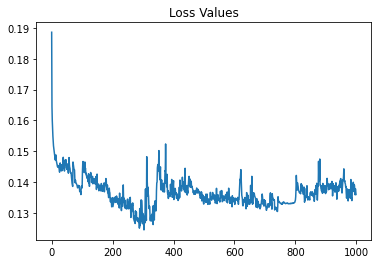

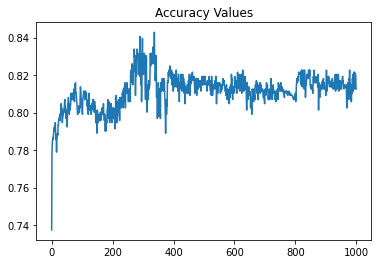

In [69]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()

In [70]:
def predict(data):
    HasilPredict = []
    for i in data:
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(round(float(o_output)))
    return HasilPredict

In [71]:
prediksi = predict([x_train[4]])
print(prediksi)
#e is 0
#p is 1
for i in prediksi :
  if i == 1 :
    print('Result : 1')
  elif i == 0 :
    print('Result : 0')

[0]
Result : 0


In [72]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# GUI

from tkinter import *
from tkinter import ttk
import tkinter as tk
master = tk.Tk()
n      = tk.StringVar()

Button   = Button(master, text='Prediksi',)
Label    = Label(master,  text = 'Multi Layer Perceptron', font=("Times", 25))

tk.Label(master,text="Sex").grid(row=1)
tk.Label(master,text="Age").grid(row=2)
tk.Label(master,text="SibSp").grid(row=3)
tk.Label(master,text="Parch").grid(row=4)
tk.Label(master,text="Fare").grid(row=5)
tk.Label(master,text="Embarked").grid(row=6)

e1 = ttk.Combobox(master, width = 20, textvariable = n)
e1['values'] = ('0', 
                '1')
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e5 = tk.Entry(master)
e6 = tk.Entry(master)
  
e1.grid(column = 1, row = 1)
e1.current()
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)


master.geometry('400x400+200+200')
tk.mainloop()